In [5]:
import networkx as nx

from OperatorBenchmark import OperatorBenchmark

from typing import List, Dict

from scripts import load_profiling_data,create_profiling_data_ER,separate_keys_and_values,git_branch_commit_push,create_profiling_data_ER_HPC

from scripts_old import load_runMultipleSimpleQWAK, load_runMultipleSimpleQWAK_legacy
from datetime import datetime

import os
import re

from utils.plotTools import plot_qwak

import numpy as np
import cupy as cp
from scipy.linalg import inv, expm
import networkx as nx
import time
import cupyx.scipy.linalg as cpx_scipy
from cupyx.profiler import benchmark
from matplotlib import pyplot as plt
import os
import json
import pickle
from tqdm import tqdm
import subprocess
import random
from qwak_cupy.qwak import QWAK as CQWAK
from qwak.qwak import QWAK as QWAK
from datetime import datetime

In [3]:
import os
from tqdm import tqdm

import os
from tqdm import tqdm

def process_profiling_data(path, method_name, nrange, sample_range, seed=None):
    for n in tqdm(nrange, desc="Processing n-values"):
        cumtimes = []
        for sample in sample_range:
            filename = f"{method_name}-n_{n}_sample_{sample}_pVal_0_8000_seed_{seed}.prof"
            filepath = os.path.join(path, f"n_{n}", filename)
            with open(filepath, 'r') as f:
                next(f)  # Skip the header line
                for line in f:
                    line = line.strip()
                    if not line:
                        continue
                    parts = line.split()
                    if len(parts) < 6:
                        continue
                    try:
                        cumtime = float(parts[3])
                    except (IndexError, ValueError):
                        continue
                    func_part = ' '.join(parts[5:])
                    if '(' in func_part and ')' in func_part:
                        func_name = func_part.split('(')[-1].split(')')[0]
                        if func_name == method_name:
                            cumtimes.append(cumtime)
                            break
        
        if cumtimes:
            average_cumtime = sum(cumtimes) / len(cumtimes)
            avg_folder = os.path.join(path, f"n_{n}_avg")
            os.makedirs(avg_folder, exist_ok=True)
            avg_filename = f"AVG-{method_name}-n_{n}_seed_{seed}.prof"
            avg_filepath = os.path.join(avg_folder, avg_filename)
            with open(avg_filepath, 'w') as avg_file:
                avg_file.write(f"{average_cumtime}\n")

def load_profiling_averages(path, method_name, nrange, seed=None):
    results = {}
    for n in tqdm(nrange, desc="Loading average times"):
        avg_folder = os.path.join(path, f"n_{n}_avg")
        avg_filename = f"AVG-{method_name}-n_{n}_seed_{seed}.prof"
        avg_filepath = os.path.join(avg_folder, avg_filename)
        try:
            with open(avg_filepath, 'r') as avg_file:
                results[n] = float(avg_file.readline().strip())
        except (FileNotFoundError, ValueError):
            raise ValueError(f"Average file not found or invalid format: {avg_filepath}")
    return results


nMin = 3
nMax = 1000 
n_values = list(range(nMin, nMax, 1))
pVal = 0.8
sample_range = range(0, 100, 1)
seed = 10


SCRIPT_DIR = os.getcwd()
path = os.path.normpath(os.path.join(
    SCRIPT_DIR,
    "Profiling/operator_results"
))


results = load_avg_profiling_data(
    path=path,
    method_name="init_operator",
    nrange=n_values,
    sample_range=sample_range,  # Assuming samples 0-9
    seed=seed
)

results = load_avg_profiling_data(
    path=path,
    method_name="init_operator",
    nrange=n_values,
    sample_range=sample_range,  # Assuming samples 0-9
    seed=seed
)

Deleting n_x folders: 100%|██████████| 997/997 [01:01<00:00, 16.14it/s]


In [8]:
import os
from tqdm import tqdm

def process_profiling_data(path, method_name, nrange, sample_range, seed=None):
    for n in tqdm(nrange, desc="Processing n-values"):
        cumtimes = []
        for sample in sample_range:
            filename = f"{method_name}-n_{n}_sample_{sample}_pVal_0_8000_seed_{seed}.prof"
            filepath = os.path.join(path, f"n_{n}", filename)
            with open(filepath, 'r') as f:
                next(f)  # Skip the header line
                for line in f:
                    line = line.strip()
                    if not line:
                        continue
                    parts = line.split()
                    if len(parts) < 6:
                        continue
                    try:
                        cumtime = float(parts[3])
                    except (IndexError, ValueError):
                        continue
                    func_part = ' '.join(parts[5:])
                    if '(' in func_part and ')' in func_part:
                        func_name = func_part.split('(')[-1].split(')')[0]
                        if func_name == method_name:
                            cumtimes.append(cumtime)
                            break
        
        if cumtimes:
            average_cumtime = sum(cumtimes) / len(cumtimes)
            avg_filename = f"AVG-{method_name}-n_{n}_seed_{seed}.prof"
            avg_filepath = os.path.join(path, f"n_{n}", avg_filename)
            with open(avg_filepath, 'w') as avg_file:
                avg_file.write(f"{average_cumtime}\n")

def load_profiling_averages(path, method_name, nrange, seed=None):
    results = {}
    for n in tqdm(nrange, desc="Loading average times"):
        avg_filename = f"AVG-{method_name}-n_{n}_seed_{seed}.prof"
        avg_filepath = os.path.join(path, f"n_{n}", avg_filename)
        try:
            with open(avg_filepath, 'r') as avg_file:
                results[n] = float(avg_file.readline().strip())
        except (FileNotFoundError, ValueError):
            raise ValueError(f"Average file not found or invalid format: {avg_filepath}")
    return results

nMin = 3
nMax = 1000 
n_values = list(range(nMin, nMax, 1))
pVal = 0.8
sample_range = range(0, 100, 1)
seed = 10


SCRIPT_DIR = os.getcwd()
path = os.path.normpath(os.path.join(
    SCRIPT_DIR,
    "Profiling/operator_results"
))

process_profiling_data(
    path=path,
    method_name="init_operator",
    nrange=n_values,
    sample_range=sample_range,  # Assuming samples 0-9
    seed=seed
)

process_profiling_data(
    path=path,
    method_name="build_operator",
    nrange=n_values,
    sample_range=sample_range,  # Assuming samples 0-9
    seed=seed
)

process_profiling_data(
    path=path,
    method_name="build_expm_operator",
    nrange=n_values,
    sample_range=sample_range,  # Assuming samples 0-9
    seed=seed
)
# Now, load the processed average profiling data from the AVG- files.
results = load_avg_profiling_data(path, method_name, nrange, pVal=pVal, seed=seed)

Processing n-values: 100%|██████████| 997/997 [00:51<00:00, 19.44it/s]


NameError: name 'method_name' is not defined

In [ ]:

nMin = 3
nMax = 1000 
n_values = list(range(nMin, nMax, 1))
pVal = 0.8
sample_range = range(0, 100, 1)
seed = 100


SCRIPT_DIR = os.getcwd()
path = os.path.normpath(os.path.join(
    SCRIPT_DIR,
    "Profiling/operator_results"
))
# Verify path exists
if not os.path.exists(path):
    print(f"ERROR: Path not found - {path}")
    print("Current directory contents:", os.listdir(SCRIPT_DIR))
    exit()
# Now load data
result = load_profiling_data(
    path=path,
    method_name="init_operator",
    nrange=n_values,
    sample_range=sample_range,  # Assuming samples 0-9
    pVal=pVal,
    seed=seed
)
result2 = load_profiling_data(
    path=path,
    method_name="build_operator",
    nrange=n_values,
    sample_range=sample_range,  # Assuming samples 0-9
    pVal=pVal,
    seed=seed
)

result3 = load_profiling_data(
    path=path,
    method_name="build_expm_operator",
    nrange=n_values,
    sample_range=sample_range,  # Assuming samples 0-9
    pVal=pVal,
    seed=seed
)

Processing n-values: 100%|██████████| 997/997 [00:49<00:00, 20.25it/s]


In [ ]:
def merge_by_sum(dict_a, dict_b):
    """
    Merge two dictionaries by summing the values of matching keys.
    Assumes both dictionaries have the same keys.
    """
    merged = {}
    for key in dict_a:
        merged[key] = dict_a[key] + dict_b[key]
    return merged


params = {
    'figsize': (12, 8),
    'plot_title' : f'Spectral Decomposition vs Expm',
    'x_label' : 'Graph Size N',
    'y_label' : "Time",
    'legend_labels' : ['spec decomp','expm'],
    'legend_loc': "best",
    'legend_title' : 'Solutions',
    'legend_ncol' : 1,
    # 'color_list' : ['#0000FF', '#008000', '#525252'],
    'color_list' : ['b','g','r'],
    'line_style_list' : ['--', '-','-.' ],
    'save_path' : f'ImgOutput/benchmark-OPERATOR.png',
    'use_loglog': False,
    'use_cbar' : False,
    'cbar_label' : None, 
    'cbar_ticks' : None,
    'cbar_tick_labels' : None,
    'x_lim' : None,
    # 'x_num_ticks' : 10,
    'y_num_ticks' : 5,
    'x_round_val' : 2,
    'y_round_val' : 3,
    # 'v_line_values' : v_line_values,
    # # 'v_line_style': '--',
    'title_font_size': 20,
    'xlabel_font_size': 22,
    'ylabel_font_size': 22,
    'legend_font_size': 14,
    'legend_title_font_size': 14,
    'tick_font_size': 18,}

merged_result = merge_by_sum(result, result2)
result_keys, result_values = separate_keys_and_values(merged_result)
# result_keys, result_values = separate_keys_and_values(result)
# result2_keys, result2_values = separate_keys_and_values(result2)
result3_keys, result3_values = separate_keys_and_values(result3)



x_value_matrix = [result_keys,result3_keys]
y_value_matrix = [result_values,result3_values]

plot_qwak(x_value_matrix = x_value_matrix, y_value_matrix = y_value_matrix,**params)

In [ ]:
nMin = 3
nMax = 1000 
n_values = list(range(nMin, nMax, 1))
pVal = 0.8
sample_range = range(0, 100, 1)
seed = 10


SCRIPT_DIR = os.getcwd()
path = os.path.normpath(os.path.join(
    SCRIPT_DIR,
    "Profiling/hiperwalk_results"
))
# Verify path exists
if not os.path.exists(path):
    print(f"ERROR: Path not found - {path}")
    print("Current directory contents:", os.listdir(SCRIPT_DIR))
    exit()
# Now load data
result_hiperwalk_init = load_profiling_data(
    path=path,
    method_name="init_hiperwalk",
    nrange=n_values,
    sample_range=sample_range,  # Assuming samples 0-9
    pVal=pVal,
    seed=seed
)
result_hiperwalk_simulate = load_profiling_data(
    path=path,
    method_name="simulate",
    nrange=n_values,
    sample_range=sample_range,  # Assuming samples 0-9
    pVal=pVal,
    seed=seed
)

Processing n-values: 100%|██████████| 997/997 [00:45<00:00, 21.96it/s]


In [ ]:
def merge_by_sum(dict_a, dict_b):
    """
    Merge two dictionaries by summing the values of matching keys.
    Assumes both dictionaries have the same keys.
    """
    merged = {}
    for key in dict_a:
        merged[key] = dict_a[key] + dict_b[key]
    return merged

params = {
    'figsize': (12, 8),
    'plot_title' : f'Spectral Decomposition vs Expm',
    'x_label' : 'Graph Size N',
    'y_label' : "Time",
    'legend_labels' : ['spec decomp','expm'],
    'legend_loc': "best",
    'legend_title' : 'Solutions',
    'legend_ncol' : 1,
    # 'color_list' : ['#0000FF', '#008000', '#525252'],
    'color_list' : ['b','g','r'],
    'line_style_list' : ['--', '-','-.' ],
    'save_path' : f'ImgOutput/benchmark-hiperwalk.png',
    'use_loglog': False,
    'use_cbar' : False,
    'cbar_label' : None, 
    'cbar_ticks' : None,
    'cbar_tick_labels' : None,
    'x_lim' : None,
    # 'x_num_ticks' : 10,
    'y_num_ticks' : 5,
    'x_round_val' : 2,
    'y_round_val' : 3,
    # 'v_line_values' : v_line_values,
    # # 'v_line_style': '--',
    'title_font_size': 20,
    'xlabel_font_size': 22,
    'ylabel_font_size': 22,
    'legend_font_size': 14,
    'legend_title_font_size': 14,
    'tick_font_size': 18,}

result_keys, result_values = separate_keys_and_values(result_hiperwalk_init)
# result_keys, result_values = separate_keys_and_values(result)
# result2_keys, result2_values = separate_keys_and_values(result2)
result3_keys, result3_values = separate_keys_and_values(result_hiperwalk_simulate)

result_hiperwalk = merge_by_sum(result_hiperwalk_init, result_hiperwalk_simulate)



x_value_matrix = [result_keys,result3_keys]
y_value_matrix = [result_values,result3_values]

plot_qwak(x_value_matrix = x_value_matrix, y_value_matrix = y_value_matrix,**params)

{3: 0.0014200000000000003, 4: 0.00127, 5: 0.0017000000000000001, 6: 0.002, 7: 0.00201, 8: 0.002, 9: 0.002, 10: 0.002, 11: 0.002, 12: 0.002, 13: 0.002, 14: 0.00202, 15: 0.0027, 16: 0.00297, 17: 0.0030299999999999997, 18: 0.003, 19: 0.003, 20: 0.003, 21: 0.003, 22: 0.00317, 23: 0.00373, 24: 0.00406, 25: 0.00404, 26: 0.00417, 27: 0.004070000000000001, 28: 0.00406, 29: 0.00451, 30: 0.005, 31: 0.00506, 32: 0.00505, 33: 0.00505, 34: 0.0058, 35: 0.006, 36: 0.00601, 37: 0.00611, 38: 0.0062, 39: 0.006960000000000001, 40: 0.007000000000000001, 41: 0.0070999999999999995, 42: 0.007000000000000001, 43: 0.007039999999999999, 44: 0.00705, 45: 0.00767, 46: 0.00801, 47: 0.00797, 48: 0.00813, 49: 0.00827, 50: 0.008369999999999999, 51: 0.008539999999999999, 52: 0.00877, 53: 0.009089999999999999, 54: 0.009139999999999999, 55: 0.00979, 56: 0.01, 57: 0.01048, 58: 0.01146, 59: 0.011399999999999999, 60: 0.01193, 61: 0.01202, 62: 0.01325, 63: 0.013080000000000001, 64: 0.01931, 65: 0.019600000000000003, 66: 0.0

In [1]:
nMin = 3
nMax = 1000
n_values = list(range(nMin, nMax, 1))
pVal = 0.8
sample_range = range(0,30, 1)
seed = 10


SCRIPT_DIR = os.getcwd()
path = os.path.normpath(os.path.join(
    SCRIPT_DIR,
    "Profiling/hiperwalk_results_hpc"
))
# Verify path exists
if not os.path.exists(path):
    print(f"ERROR: Path not found - {path}")
    print("Current directory contents:", os.listdir(SCRIPT_DIR))
    exit()
# Now load data
result_hiperwalk_init_hpc = load_profiling_data(
    path=path,
    method_name="init_hiperwalk",
    nrange=n_values,
    sample_range=sample_range,  # Assuming samples 0-9
    pVal=pVal,
    seed=seed
)
result_hiperwalk_simulate_hpc = load_profiling_data(
    path=path,
    method_name="simulate",
    nrange=n_values,
    sample_range=sample_range,  # Assuming samples 0-9
    pVal=pVal,
    seed=seed
)

NameError: name 'os' is not defined

In [36]:
def merge_by_sum(dict_a, dict_b):
    """
    Merge two dictionaries by summing the values of matching keys.
    Assumes both dictionaries have the same keys.
    """
    merged = {}
    for key in dict_a:
        merged[key] = dict_a[key] + dict_b[key]
    return merged




result_hiperwalk_hpc = merge_by_sum(result_hiperwalk_init_hpc, result_hiperwalk_simulate_hpc)


In [ ]:
params = {
    'figsize': (12, 8),
    'plot_title' : f'Spectral Decomposition vs Expm',
    'x_label' : 'Graph Size N',
    'y_label' : "Time",
    'legend_labels' : ['Hiperwalk','Hiperwalk HPC', 'QWAKNP','QWAKCP'],
    'legend_loc': "best",
    'legend_title' : 'Solutions',
    'legend_ncol' : 1,
    # 'color_list' : ['#0000FF', '#008000', '#525252'],
    'color_list' : ['b','g','r'],
    'line_style_list' : ['--', '-','-.' ],
    'save_path' : f'ImgOutput/benchmark-hiperwalk.png',
    'use_loglog': False,
    'use_cbar' : False,
    'cbar_label' : None, 
    'cbar_ticks' : None,
    'cbar_tick_labels' : None,
    'x_lim' : None,
    # 'x_num_ticks' : 10,
    'y_num_ticks' : 5,
    'x_round_val' : 2,
    'y_round_val' : 3,
    # 'v_line_values' : v_line_values,
    # # 'v_line_style': '--',
    'title_font_size': 20,
    'xlabel_font_size': 22,
    'ylabel_font_size': 22,
    'legend_font_size': 14,
    'legend_title_font_size': 14,
    'tick_font_size': 18,}

# QWAK Results - Old Method

In [2]:


# Parameters
nMin = 3
nMax = 1000
nList = list(range(nMin, nMax, 1))
pVal = 0.8
samples = 100
t = 100

# base_dir = 'Datasets/Benchmark-SimpleQWAK-Test_ER2'
# base_dir = 'Datasets/Benchmark-SimpleQWAK-Test_ER2'
# base_dir_cupy = 'Datasets/Benchmark-SimpleQWAK_ER3_CuPy'

base_dir_cupy_970 = 'Profiling\Old\Benchmark-SimpleQWAK_ER-CuPy_970'
base_dir_cupy_3070 = 'Profiling\Old\Benchmark-SimpleQWAK_ER2_CuPy_3070'
base_dir_cupy_3070_2 = 'Profiling\Old\Benchmark-SimpleQWAK_ER2_CuPy_3070_2'
base_dir = 'Profiling\Old\Benchmark-SimpleQWAK_ER-NumPy'

# runMultipleSimpleQWAK(nList, pVal, t, samples, base_dir, hpc = False)
avg_list = load_runMultipleSimpleQWAK_legacy(nList, pVal,samples, t, base_dir)

avg_list_cupy_970 = load_runMultipleSimpleQWAK_legacy(nList, pVal,samples, t, base_dir_cupy_970)

avg_list_cupy_3070_2 = load_runMultipleSimpleQWAK_legacy(nList, pVal,samples, t, base_dir_cupy_3070_2)
    
# runMultipleSimpleQWAK(nList, pVal, t, samples, base_dir_cupy_3070, hpc = True)
tList_cupy_3070, qwList_cupy_3070,avg_list_cupy_3070 = load_runMultipleSimpleQWAK(nList, pVal,samples, t, base_dir_cupy_3070)

print('CuPy QWAK results computed and saved.')

Loading NPQWAK data: 100%|██████████| 997/997 [00:00<00:00, 1496.00it/s]

CuPy QWAK results computed and saved.


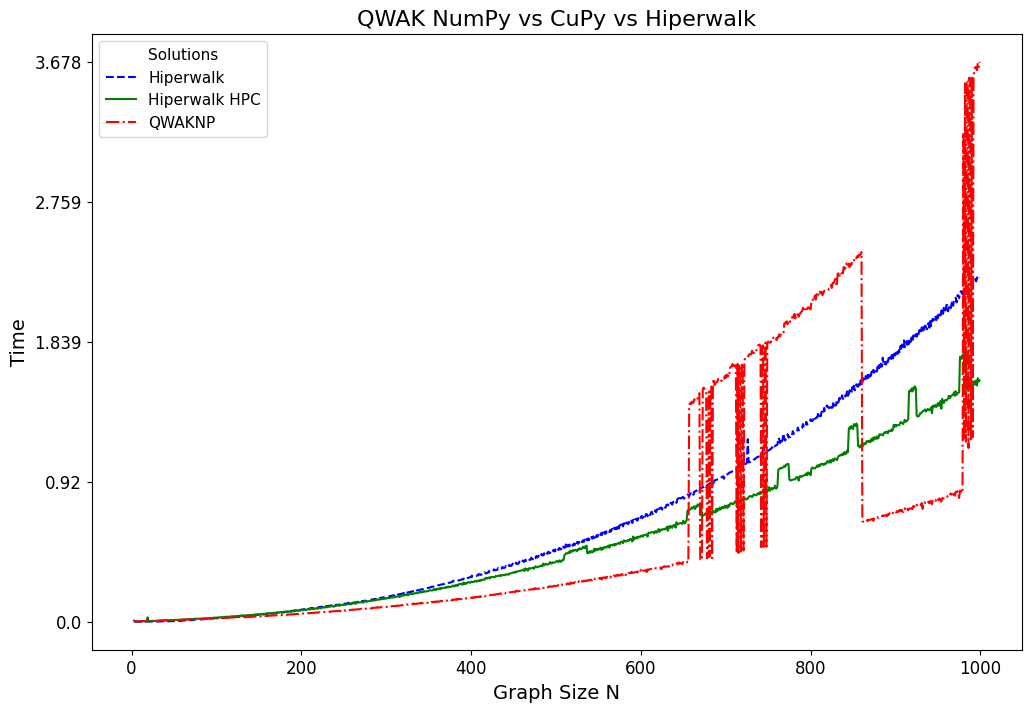

In [5]:
%matplotlib inline

params = {
    'figsize': (12, 8),
    'plot_title' : f'QWAK NumPy vs CuPy vs Hiperwalk',
    'x_label' : 'Graph Size N',
    'y_label' : "Time",
    'legend_labels' : ['Hiperwalk','Hiperwalk HPC', 'QWAKNP','QWAKCP'],
    'legend_loc': "best",
    'legend_title' : 'Solutions',
    'legend_ncol' : 1,
    # 'color_list' : ['#0000FF', '#008000', '#525252'],
    'color_list' : ['b','g','r','y'],
    'line_style_list' : ['--', '-','-.' ],
    'save_path' : f'ImgOutput/benchmark-hiperwalk_hpwhpc_numpy_cupy.png',
    'use_loglog': False,
    'use_cbar' : False,
    'cbar_label' : None, 
    'cbar_ticks' : None,
    'cbar_tick_labels' : None,
    'x_lim' : None,
    # 'x_num_ticks' : 10,
    'y_num_ticks' : 5,
    'x_round_val' : 2,
    'y_round_val' : 3,
    # 'v_line_values' : v_line_values,
    # # 'v_line_style': '--',
    'title_font_size': 20,
    'xlabel_font_size': 22,
    'ylabel_font_size': 22,
    'legend_font_size': 14,
    'legend_title_font_size': 14,
    'tick_font_size': 18,
    'use_grid':True,
    'marker_list': ['x', 'o']}
# # Record start datetime

# print(result_hiperwalk.keys())
x_value_matrix = [nList,nList,nList]
y_value_matrix = [avg_list,avg_list_cupy_970,avg_list_cupy_3070_2]

plot_qwak(x_value_matrix = x_value_matrix, y_value_matrix = y_value_matrix,**params)